(01-grama-intro)=
# A Grammar of Model Analysis: Grama

---

This chapter is about a *grammar of model analysis*. Just like English grammar, a grammar of model analysis gives rules about how objects fit together; specifically, *models*, *data*, and the *verbs* that relate them. This ruleset is designed to facilitate model analysis *under uncertainty*.

These rules are *implemented* in the Python package `py-grama`. Using the `py-grama` package, you will be able to reproduce *all* of the case studies in this book. This means you can immediately take the code in this book and start applying it to your own studies! The `py-grama` package is free and open source software, hosted on GitHub at this url: [https://github.com/zdelrosario/py_grama](https://github.com/zdelrosario/py_grama).

**Learning Objectives** In this chapter, you will learn

- how to install the `py-grama` Python package
- key concepts used in `py-grama`
- the basics of using `py-grama` to do model analysis under uncertainty, through a quick case study

To best-use this book, you should follow the Quick Start instructions below to install `py-grama` and get familiar with the software.


## Quick Start

---

This quick start guide will take you through installing `py-grama`, loading in a simple model, and analyzing with some exploratory model analysis tools. The purpose of this quick start is *not* to solve a scientific problem, but rather to introduce the `py-grama` toolkit with a very simple model.


### Install

Follow these instructions to install Python and the `py-grama` package.

#### Install Anaconda Python.

[Anaconda](https://www.anaconda.com/distribution/) is a way to install Python that includes many tools for scientific computing. We recommend starting from Anaconda to help take care of dependencies.

#### Use the Python package manager to install py-grama

Open your [Anaconda prompt](https://docs.anaconda.com/anaconda/user-guide/getting-started/#cli-hello), type the following line into your prompt, and hit return (enter).

```
$ pip install py-grama
```

This will automatically download Grama and install its dependencies.

```{admonition} Prompt vs Python
Throughout this book, we will use the symbol $ to denote code you should run in your Anaconda prompt. This will be infrequent, but important to notice!
```

#### Test your install

Start a Python terminal (Open [Anaconda prompt](https://docs.anaconda.com/anaconda/user-guide/getting-started/#cli-hello), and use the command `python`) and run the code:

In [1]:
import grama as gr

If this runs without error, then you have successfully installed Grama!


### Jupyter Notebooks

Above, you ran Python code in a *terminal*; this is helpful for using Python like a calculator, but does not allow you to save your work. Python code is sometimes saved in *scripts*; these are machine-readable files with the `.py` extension. Scripts are great for reusable code, but we prefer Jupyter notebooks for organizing studies involving equations, figures, and documentation.

Jupyter notebooks are great for writing scientific reports; in fact, the chapters of this book were written as Jupyter notebooks [^jb]!

To start Jupyter, open your anaconda prompt and run the command:

```
$ jupyter lab
```

This will open a page in your web browser with the JupyterLab interface. The JupyterLab documentation has more information; in particular, this [overview page](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html) has a good introduction to using Jupyter. We *highly* recommend watching at least an introductory tutorial to learn how to use Jupyter notebooks.

```{admonition} Follow along!
:class: tip
To get the most out of this book, we **highly** recommend you follow along with this Quick Start! Fire up a Jupyter notebook and try the commands below.
```


### Boilerplate code

To set up `py-grama` in a Jupyter notebook, you must run the following code.


In [2]:
### Boilerplate code for setting up py-grama
import grama as gr   # This imports the py-grama package
DF = gr.Intention()  # This sets up the DataFrame "pronoun"


This code loads `py-grama` and sets up some key infrastructure for the package.

```{admonition} Package prefix
Note that the call to `Intention()` uses the `gr` prefix we set with `import grama as gr`. This is how we access *all* functions and objects in `py-grama`, unless we do `from grama import something as new_name`.
```

Next, we'll go through a quick demo of `py-grama`.


### A demo model

Run the following code to load a built-in `py-grama` model and print a summary.


In [3]:
from grama.models import make_test
md_test = make_test()
md_test


model: None

  inputs:
    var_det:
      x2: [-1, 1]

    var_rand:
      x0: (+0) uniform, {'loc': -1, 'scale': 2}
      x1: (+0) uniform, {'loc': -1, 'scale': 2}

    copula:
      Independence copula

  functions:
      f0: ['x0', 'x1', 'x2'] -> ['y0']

We'll discuss these elements of a model more below; for now, note that we have three inputs `['x0', 'x1', 'x2']` that map to one output `['y0']`. We can get a sense for how the model behaves by constructing a *sinew plot*, as the following code demonstrates.


Calling plot_sinew_outputs....


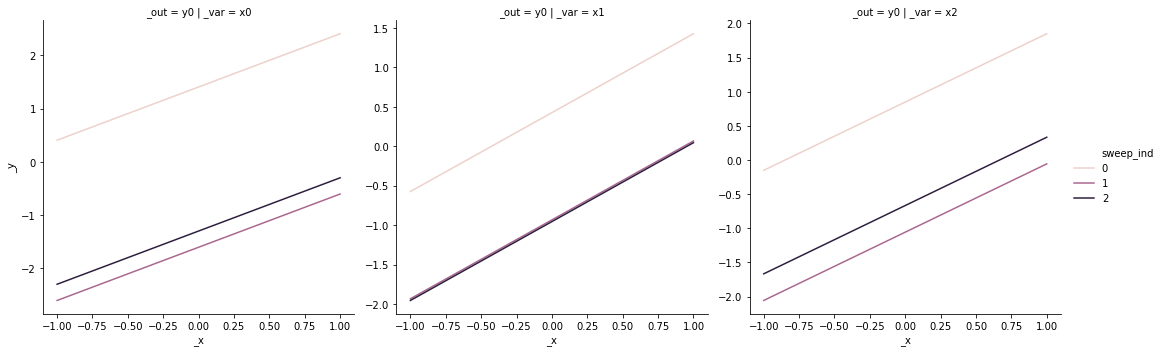

In [4]:
(
    md_test
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)

Note that the resulting plot has three columns and one row; these correspond to the three inputs (columns and horizontal axes) and one output (rows and vertical axes). Each column of this plot shows a "sweep" along a single input while holding the other inputs constant. Since model behavior can change depending on the held-constant inputs, the process repeats for a variety of starting conditions, resulting in multiple lines in each panel.

```{admonition} All linear?
:class: tip
Interpreting the plot above, it seems that the output `'y0'` is linear in all of its inputs: no matter where we start, moving along one of the inputs results in a linear trend for the output. Maybe we got lucky? With more sweeps, would we see different behavior?
```

### Overriding the defaults

The `py-grama` package is designed around providing *sensible defaults* to get you started with each function, but you can override these defaults when necessary. For instance, the following code plots more sweeps by overriding the default `n_sweeps = 10`.


Calling plot_sinew_outputs....


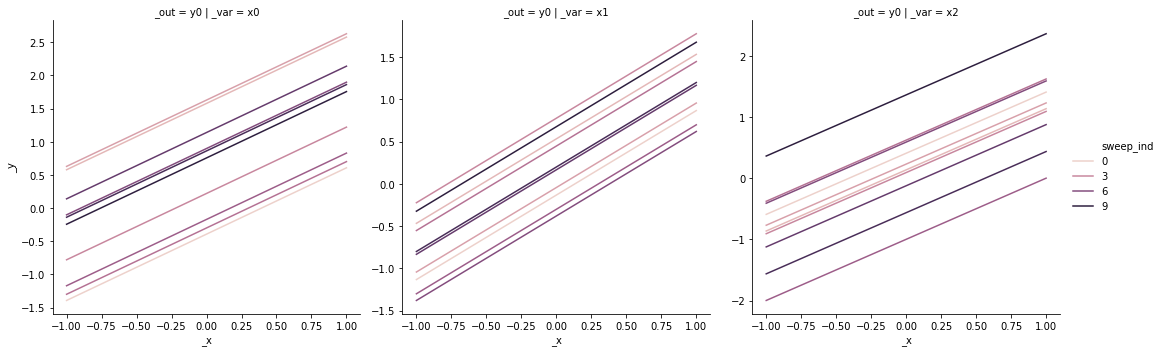

In [5]:
(
    md_test
    >> gr.ev_sinews(
        df_det="swp",
        n_sweeps=10,
    )
    >> gr.pt_auto()
)

Note that more sweeps (larger `n_sweeps`) will tend to require more compute time [^n_sweeps]. This might be easy to afford if your model is simple, but can be quite expensive as your model grows more complicated.

```{admonition} Probably linear
:class: warning
Interpreting the plot above, even with more sweeps the output `'y0'` still seems to be linear in all of its inputs. This is hardly *proof* that `'y0'` is linear in all its inputs, but the evidence certainly seems convincing for now.
```

### Getting help

No programmer memorizes *everything* in a software package! Competent programmers regularly consult *documentation* to remind themselves how to use a function, or to learn about a new function.

In Python, you can use the `help()` command to get more information on a function:


In [6]:
help(gr.eval_sinews)


Help on curry in module grama.eval_random:

eval_sinews(model='__no__default__', n_density=10, n_sweeps=3, seed=None, df_det=None, varname='sweep_var', indname='sweep_ind', append=True, skip=False)
    Sweep study
    
    Perform coordinate sweeps over each model random variable ("sinew" design).
    Use random starting points drawn from the joint density.
    
    Use gr.plot_auto() to construct a quick visualization of the output
    dataframe. Use `skip` version to visualize the design, and non-skipped
    version to visualize the results.
    
    Args:
        model (gr.Model): Model to evaluate
        n_density (numeric): Number of points along each sweep
        n_sweeps (numeric): Number of sweeps per-random variable
        seed (int): Random seed to use
        df_det (DataFrame): Deterministic levels for evaluation;
            use "nom" for nominal deterministic levels,
            use "swp" to sweep deterministic variables
        varname (str): Column name to give for s

Reading a function's documentation can be overwhelming at first, but with practice you can quickly find a lot of useful information:

- The line with `eval_sinews(...)` is the *function signature*; this shows the function with all of its possible arguments.
- The paragraphs that follow the signature describe the function in plain language.
- The lines under `Args:` detail the arguments to the function. The lines are of the form `name (type): Details`, where
  - `name` is the name of the argument
  - `type` is the expected datatype of the argument
  - `Details` follow in plain-text. If an argument only takes particular values, the `Details` should tell you about this
- The line under `Returns:` details the returned object (if any), including its datatype.
- Function documentation often includes `Examples:`; look at this section for some real-code examples of the function's use. This is particularly useful, as you can see what other objects and functions this tool is used with.

```{admonition} Documentation in Jupyter
Note that in Jupyter, you can quickly reference the documentation for a function by placing your cursor over a function you'd like to reference, and pressing the keys `Shift + Tab`. Try this in your own Jupyter notebook!
```


## Grama Concepts

---

Now that we've seen how `py-grama` works, let's look closer at the concepts behind `py-grama`. The `py-grama` package was designed around a few simple ideas: two primary kinds of objects (data and models) and four kinds of verbs.


### Objects: Data and Models

*Data (`df`)*

Data in `py-grama` is organized into [Pandas](https://pandas.pydata.org/) DataFrames. A DataFrame is a digital table, with named columns that organize observations on variables. It is a *convention* when using `py-grama` to name your DataFrames with the `df_` prefix followed by a descriptive name, for instance `df_train` for a set of training data.

The code we saw above generated a DataFrame, which was then visualized using the `gr.pt_auto()` tool. If we disable the plotting line with a comment, we can inspect the data.


In [7]:
df_results = (
    md_test
    >> gr.ev_sinews(df_det="swp")
#     >> gr.pt_auto()
)
df_results
    

,x0,x1,x2,sweep_var,sweep_ind,y0
0,-1.000000,-0.444582,-0.342595,x0,0,-1.787177
1,-0.777778,-0.444582,-0.342595,x0,0,-1.564954
2,-0.555556,-0.444582,-0.342595,x0,0,-1.342732
3,-0.333333,-0.444582,-0.342595,x0,0,-1.120510
4,-0.111111,-0.444582,-0.342595,x0,0,-0.898288
...,...,...,...,...,...,...
85,-0.791376,-0.501520,0.111111,x2,2,-1.181785
86,-0.791376,-0.501520,0.333333,x2,2,-0.959563
87,-0.791376,-0.501520,0.555556,x2,2,-0.737340
88,-0.791376,-0.501520,0.777778,x2,2,-0.515118


Note that the DataFrame `df_results` contains both numeric columns (such as `df_results.x1`) and string columns (such as `df_results.sweep_var`). We can also see some basic-but-useful facts, such as the size (90 rows x 6 columns).

On their own, data are not immediately useful. We will see a variety of *transformation* verbs we can use in `py-grama` to work with data, and we will use data to inform and even *fit* models.

The data we work with can come from a physical experiment (loaded from disk) or from a simulation (generated by a model). Either way, it will be packaged in a Pandas DataFrame. This ensures we can use consistent tools to work with data, regardless of the origin.


*Models (`md`)*

Models in `py-grama` are represented by a special `gr.Model` Python class. A model is essentially a capsule containing functions that map inputs to outputs, and information about the inputs. We saw some of this information summarized when we printed `md_test` above.


In [8]:
md_test

model: None

  inputs:
    var_det:
      x2: [-1, 1]

    var_rand:
      x0: (+0) uniform, {'loc': -1, 'scale': 2}
      x1: (+0) uniform, {'loc': -1, 'scale': 2}

    copula:
      Independence copula

  functions:
      f0: ['x0', 'x1', 'x2'] -> ['y0']

Reading these lines, we can see the key information about the model summarized as text:

- The `inputs` organize the model inputs into two categories:
  - `var_det` are the *deterministic* variables; these are assumed to be *perfectly known*, and *must* be set in order to run the model. Deterministic variables are reported with their bounds
  - `var_rand` are the *random* variables; these are assumed to be *fundamentally unknowable*, and can be *sampled* according to their distribution. Random variables are reported with their distribution type and parameters.
- The `copula` describes the relationship between random variables. In the example above, the random variables are assumed to be mutually independent.
- The `functions` list all of the mappings from inputs to outputs.
  - The example above has just one function `f0`, which maps all of its inputs to the single output `y0`.
  
In `py-grama`, models are used to represent scenarios with quantified uncertainties. We can use models to run simulations (generate synthetic data), to propagate uncertainty, or even as a template to fit a model to data.


### Verbs: Four fundamental verbs

The `py-grama` package focuses on data and model objects, and provides four kinds of *verbs* that inter-relate the two object types. The relationship between these objects and verbs constitutes the *grammar* of this grammar of model analysis.

In short, the four verbs relate data and models according to Figure {numref}`verb-classes`.

```{figure} ../images/verb-classes-bw.png
---
name: verb-classes
---
The `py-grama` verbs, as they relate to data and models.
```

In greater detail, the four verbs are:

* A *transformation* (`tran_`) transforms one DataFrame into another DataFrame. We might want a transformation to perform some simple calculation (like converting from Fahrenheit to Celsius), to reshape a dataset, to convert from one datatype to another, and so on.
* An *evaluation* (`eval_`) uses a Model to generate a DataFrame. Evaluation routines are used to run a variety of simulations, such as a simple planned run (`gr.eval_df()`), a Monte Carlo simulation (`gr.eval_monte_carlo()`), or a more advanced reliability-assessment technique (e.g. `gr.eval_form_pma()`).
* A *fit* (`fit_`) uses a training DataFrame to generate a Model. We could start with a user-defined model and fit its free parameters (`gr.fit_nls()`), or use a purely empirical approach to modeling the data (e.g. `gr.fit_gp()`).
* A *composition* (`comp_`) is used to modify an existing Model. Composition routines are generally used in the model-building phase of a study, though we can also use them to make small adjustments to a model.

Like any language, there are also some exceptional verbs:

* Plotting routines (`plot_`) are used to visualize data. You are of course free to plot your data however you like, but know that the magic `gr.plot_auto()` routine is available to provide a quick visualization for many of the outputs of `eval_` verbs.


The following table summarizes the verbs in terms of their prefixes and input-output datatypes.

```{table} Table of verbs and prefixes.
---
name: tab-verbs
---
| Verb    | Short | In   | Out  |
|---------|-------|------|------|
| `tran_` | `tf_` | `df` | `df` |
| `eval_` | `ev_` | `md` | `df` |
| `fit_`  | `ft_` | `df` | `md` |
| `comp_` | `cp_` | `md` | `md` |
| `plot_` | `pt_` | `df` |  --  |
```

```{admonition} Recognizing a new verb
The verb prefixes `tran_` (`tf_`), `eval_` (`ev_`), `fit_` (`ft_`), and `comp_` (`cp_`) are *signifiers* to help you recognize something about a verb just by looking at it. Remember that the prefix will tell you the type of the verb's first input, and the type of its return value.
```

### Functional programming

The `py-grama` package also provides some special syntax for *functional programming*-style computational pipelines. One of the advantages of this style of programming is that we can eliminate *intermediate variable names*. For instance, consider the following *imperative*-style code:


Calling plot_sinew_outputs....


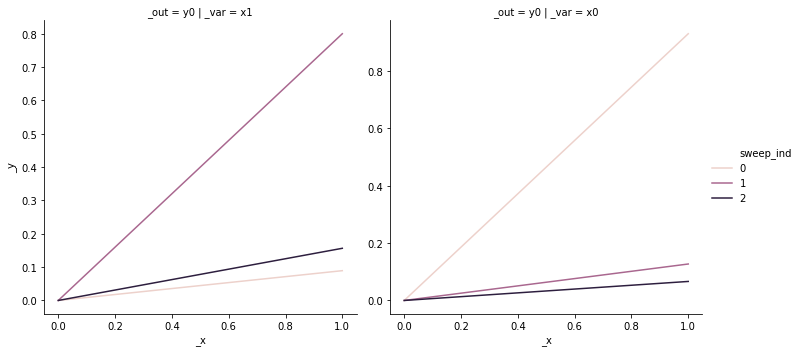

In [9]:
## Build the model
md_temporary = gr.Model("Temporary model")
md_temporary = gr.comp_function(
    md_temporary,
    fun=lambda X: X[0] * X[1],
    var=2,
    out=1
)
md_temporary = gr.comp_bounds(
    md_temporary,
    x0=(0, 1),
    x1=(0, 1),
)

## Generate results
df_temporary = gr.eval_sinews(
    md_temporary,
    df_det="swp",
)

## Visualize
gr.plot_auto(df_temporary)


Now compare with *functional*-style code:


Calling plot_sinew_outputs....


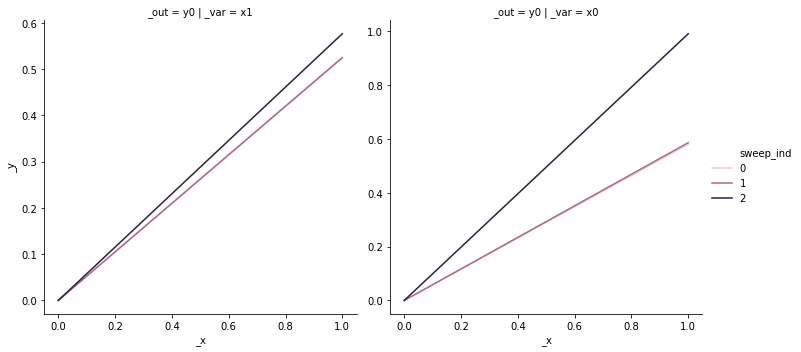

In [10]:
(
    gr.Model("Temporary model")
    >> gr.cp_function(
        fun=lambda X: X[0] * X[1],
        var=2,
        out=1,
    )
    >> gr.cp_bounds(
        x0=(0, 1),
        x1=(0, 1),
    )
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)

The functional-style code is more compact and does not require us to set intermediate variable names. However, it can be confusing to read---at first.

One idea that helps make functional-style code more readable is to think of the *pipe operator* `>>` as the phrase "and then". This makes the following code:

```python
(
    gr.Model(...)
    >> gr.cp_function(...)
    >> gr.cp_bounds(...)
    >> gr.ev_sinews(...)
)
```

Read more like natural language:

```
(
    Create a model
    and then compose with a function
    and then compose with bounds
    and then evaluate sinews
)
```

```{admonition} Short-prefixes for functional-style code
Note also that the short two-letter prefixes (e.g. `ev_`) are used for functional-style code, as opposed to the long forms of the prefix (e.g. `eval_`). If you find that your code throws errors, make sure you're using the correct form of the prefix!
```

### More on `py-grama`

This concludes the brief tour of `py-grama`. For more information, you can read the [Grama Reference](04-grama-ref) appendix entry, and the official documentation, hosted at [https://py-grama.readthedocs.io/en/latest/](https://py-grama.readthedocs.io/en/latest/).


## A Brief Case Study: Assessing Structural Safety

---

We end this chapter with an example of using `py-grama` to analyze the safety of a structural plate, subject to compressive forces. Plates are common in many kinds of structures; for instance, the skin of an airplane wing is designed to take some of the bending loads due to lift generation. If one of these skin panels *buckles*, it will crumple and potentially lead to unsafe deformation of the wing. However, variability in manufacturing means no two plates will perform exactly the same. We will analyze the safety of plates under buckling by performing a reliability analysis---assessing the probability of failure.

All scientific and engineering projects should have some sort of *goal*; the case studies in this book are no different.

```{admonition} Goals for this case study
In studying these plates, our **goal** is to determine an appropriate thickness of plate that will support a desired compressive load of 1 ksi with a low chance of buckling. For this study, we seek a failure rate less than 1 in a 100.
```

First, we set up the case study by importing some data on aluminum plate material properties, and load a package to visualize the data.


In [11]:
import plotnine as pt           # For visualizing data
from grama.data import df_stang # Dataset for modeling

```{admonition} Install plotnine
If you do not have `plotnine` installed, you can install it from Anaconda prompt with the command `pip install plotnine`.
```

```{admonition} Representative data
:class: warning
In order for data to be appropriate for our study, they must be **representative** of the manufacturing process we will use to produce the plates. (It can't just be any old data!) In this case study, we will assume the data come from our desired manufacturing process.
```

Let's inspect the data we just loaded.


In [12]:
df_stang

,thick,alloy,E,mu,ang
0,0.022,al_24st,10600,0.321,0
1,0.022,al_24st,10600,0.323,0
2,0.032,al_24st,10400,0.329,0
3,0.032,al_24st,10300,0.319,0
4,0.064,al_24st,10500,0.323,0
...,...,...,...,...,...
71,0.064,al_24st,10400,0.327,90
72,0.064,al_24st,10500,0.320,90
73,0.081,al_24st,9900,0.314,90
74,0.081,al_24st,10000,0.316,90


These are observations on the elasticity `E` (ksi) and Poisson ratio `mu` (-) of a rolled aluminum alloy, with multiple specimens prepared and tested {cite}`stang1946`. Elasticity is a measure of "stiffness" of a material [^stretch]; the higher the `E` value, the more force it takes to stretch a part. The Poisson ratio is sometimes called the volume contraction ratio; by way of example, when stretching a rubber band, the band will tend to get thinner in the middle. The Poisson ratio of a material determines how much thinner a part will tend to get when stretched. These two properties affect the buckling strength of a plate; we'll see this when we study the buckling equation below.

However, before we study buckling, we will use these data to build a model for the *uncertainty* in the material properties.


### Building the model

When building a model from data, we should first inspect the data to make sure the data are trustworthy. This process will help us check our assumptions and data quality.

```{admonition} Properties are thickness-independent?
:class: tip
Material properties such as elasticity and the Poisson ratio are generally thought to be thickness-independent. If this is the case, then we don't need to worry too much about relating the material properties to the chosen plate thickness, which will greatly simplify modeling. However, we should check this assumption using our data!
```

The following plot shows Poisson ratio against elasticity, with the thickness of each specimen denoted by the shapes of the points.


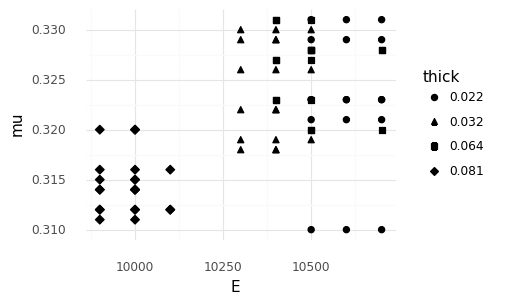

<ggplot: (8770623694533)>

In [13]:
(
    df_stang
    >> gr.tf_mutate(thick=gr.as_factor(DF.thick))
    >> pt.ggplot(pt.aes("E", "mu", shape="thick"))
    + pt.geom_point(size=2)
    + pt.theme_minimal()
    + pt.theme(figure_size=(4, 3))
)

This plot implies that the material properties are *not* thickness independent! However, the patterns in the data are rather suspicious....

```{admonition} Outliers
:class: warning
Based on the figure above, the specimens of thickness `0.081` (in) are suspicious; these observations are well-separated from all the other cases. Reviewing the original publication that reported these data {cite}`stang1946`, it turns out that the thickest specimens were characterized with a different measurement procedure than the thinner specimens. This suggests that the measurements of the thickest specimens might not be compatible with the measurements of the thinnest specimens.
```

Let's filter out the thickest specimens and see if the remaining observations are relatively consistent.


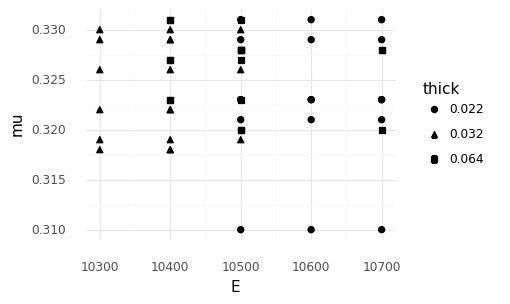

<ggplot: (8770626969337)>

In [14]:
df_filtered = (
    df_stang
    >> gr.tf_filter(DF.thick < 0.081)
)

(
    df_filtered
    >> gr.tf_mutate(thick=gr.as_factor(DF.thick))
    >> pt.ggplot(pt.aes("E", "mu", shape="thick"))
    + pt.geom_point(size=2)
    + pt.theme_minimal()
    + pt.theme(figure_size=(4, 3))
)

The remaining observations are fairly consistent, even across different thicknesses. Given what we know, we will advance by ignoring the thickest specimen data, and limit our attention to plates studied in the remaining data. This leaves us with plates roughly between 1/48" and 1/16" in thickness.

```{admonition} Talk to experts!
:class: tip
If we were in the business of manufacturing plates, this would be an *excellent* time to go have a chat with the materials and process (M&P) engineers about their experiments. We would ask about the two different characterization procedures, and ask for their opinion on how to use the data to inform our structural reliability analysis. We assumed the thickest specimens were less trustworthy, but their expert opinion might be different.
```


Now that we have a subset of data that we *trust*, we can proceed to build a probabilistic model for the uncertainty in material properties. As we'll see in Chapter TODO, we will need a model (rather than just data) in order to study the very small failure probabilities that we seek. The following code fits a joint distribution for `E, mu` based on the filtered data.


In [15]:
md_aluminum = (
    gr.Model("Plate aluminum material properties")
    >> gr.cp_marginals(
        E=gr.marg_named(df_filtered.E, "lognorm"),
        mu=gr.marg_named(df_filtered.mu, "beta"),
    )
    >> gr.cp_copula_gaussian(
        df_data=df_filtered
    )
)
md_aluminum


model: Plate aluminum material properties

  inputs:
    var_det:

    var_rand:
      E: (+0) lognorm, {'s': 7.36048659652516, 'loc': 10299.999999999998, 'scale': 4.90067731859436}
      mu: (+0) beta, {'a': 6.906673364779303, 'b': 0.6456702700075123, 'loc': 0.2616870498769197, 'scale': 0.06931295012308032}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.103391

  functions:

```{admonition} A reasonable fit?
:class: tip
We chose a couple of marginal distribution shapes above: lognormal for `E` and beta for `mu`. How well do these choices represent the original data?
```

To assess the model fit, visualize the original Experimental data against Synthetic realizations from our distribution model.


eval_monte_carlo() is rounding n...
Design runtime estimates unavailable; model has no timing data.


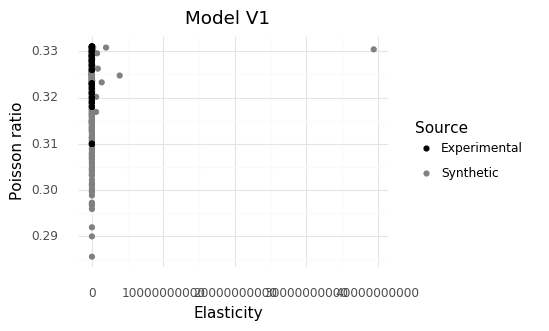

<ggplot: (8770623783093)>

In [16]:
(
    md_aluminum
    ## Draw realizations from distribution
    >> gr.ev_monte_carlo(n=1e3, seed=101, df_det="nom", skip=True)
    >> gr.tf_mutate(source="Synthetic")
    ## Add in the experimental data
    >> gr.tf_bind_rows(
        df_filtered
        >> gr.tf_mutate(source="Experimental")
    )
    ## Compare the synthetic and experimental data
    >> pt.ggplot(pt.aes("E", "mu", color="source"))
    + pt.geom_point()
    + pt.scale_color_manual(
        values=dict(Experimental="black", Synthetic="grey"),
        name="Source",
    )
    + pt.theme_minimal()
    + pt.theme(figure_size=(4, 3))
    + pt.labs(x="Elasticity", y="Poisson ratio", title="Model V1")
)

```{admonition} Extreme outliers in elasticity!
:class: warning
The chosen shape for the elasticity `E` produes extreme outliers that do not appear in the original data. We have no evidence to support such extreme tail behavior. We should change the marginal for `E`.
```

Update the model to use a marginal shape for `E` with less extreme tail behavior. Let's repeat the comparison to check our updated model.


eval_monte_carlo() is rounding n...
Design runtime estimates unavailable; model has no timing data.


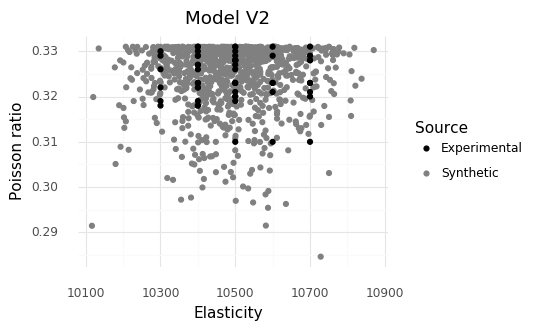

<ggplot: (8770627030725)>

In [17]:
md_aluminum_v2 = (
    gr.Model("Plate aluminum material properties")
    >> gr.cp_marginals(
        E=gr.marg_named(df_filtered.E, "norm"),
        mu=gr.marg_named(df_filtered.mu, "beta"),
    )
    >> gr.cp_copula_gaussian(
        df_data=df_filtered
    )
)

(
    md_aluminum_v2
    ## Draw realizations from distribution
    >> gr.ev_monte_carlo(n=1e3, seed=101, df_det="nom", skip=True)
    >> gr.tf_mutate(source="Synthetic")
    ## Add in the experimental data
    >> gr.tf_bind_rows(
        df_filtered
        >> gr.tf_mutate(source="Experimental")
    )
    ## Compare the synthetic and experimental data
    >> pt.ggplot(pt.aes("E", "mu", color="source"))
    + pt.geom_point()
    + pt.scale_color_manual(
        values=dict(Experimental="black", Synthetic="grey"),
        name="Source",
    )
    + pt.theme_minimal()
    + pt.theme(figure_size=(4, 3))
    + pt.labs(x="Elasticity", y="Poisson ratio", title="Model V2")
)

This looks much more reasonable! The Synthetic and Experimental data exhibit much more similar variability.

```{admonition} "Gridded" experimental values...
:class: tip
Note that the experimental values seem to lie on a grid: It appears the elasticity values have been rounded to the nearest hundred ksi. The standard deviation of the observed values is around 123 ksi, while the standard deviation of the rounding (assuming a uniform distribution) is $100 / \sqrt{12} \approx 29$. This means we are under-accounting for the variability in the data by a small amount. For our purposes this is not likely to cause a severe issue, but for more precise calculations---say, a more strict reliability requirement---this is a factor worth considering.
```

Now that we have a reasonable model for the material properties, we can turn our attention to mapping these inputs to the buckling behavior of the plate. Buckling is analyzed in terms of the *critical buckling stress* $\sigma$ of a particular part. The larger this stress, the greater capacity the part has to withstand a buckling load.

The critical buckling stress for a plate in compression is a classic result from structural mechanics {cite}`peery2011aircraft`, given by

$$\sigma_{\text{buckling}} = \frac{\pi^2 E}{12(1 - \mu^2)}\left(\frac{t}{a}\right)^2,$$

with symbols disambiguated in the table below.

| Symbol | Meaning |
|--------|---------|
| $E$    | Aluminum elasticity |
| $\mu$  | Aluminum Poisson ratio |
| $t$    | Plate thickness |
| $a$    | Plate length |
| $\sigma_{\text{buckling}}$ | Buckling stress |

```{admonition} Anticipate your sanity checks
:class: tip
Based on the equation above---and based on general physical intuition---we should have some expectations about the output's behavior with its inputs. For instance, we would expect the buckling stress to get larger with a larger thickness: a thicker plate is harder to buckle. Conversely, we would expect a longer plate to buckle more easily, leading to a smaller buckling stress.
```

We can implement this function and add it to our `py-grama` model. The code below does this.


In [18]:
md_plate = (
    md_aluminum_v2
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            sigma_buckle=3.14159**2 * df.E
                        / 12 / (1 - df.mu**2)
                        * df.a**2 / df.t**2
        ),
        var=["E", "mu", "a", "t"],
        out=["sigma_buckle"],
        name="Buckling strength",
    )
    >> gr.cp_bounds(
        a=(2, 6),
        t=(1/48, 1/16),
    )
)
md_plate


model: Plate aluminum material properties

  inputs:
    var_det:
      t: [0.020833333333333332, 0.0625]
      a: [2, 6]

    var_rand:
      E: (+0) norm, {'loc': 10494.444444444445, 'scale': 122.34841969747357}
      mu: (+0) beta, {'a': 6.906673364779303, 'b': 0.6456702700075123, 'loc': 0.2616870498769197, 'scale': 0.06931295012308032}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.030156

  functions:
      Buckling strength: ['E', 'mu', 'a', 't'] -> ['sigma_buckle']

When implementing a model, it is a good idea to use sinews as a sanity-check. We do so below.


Calling plot_sinew_outputs....


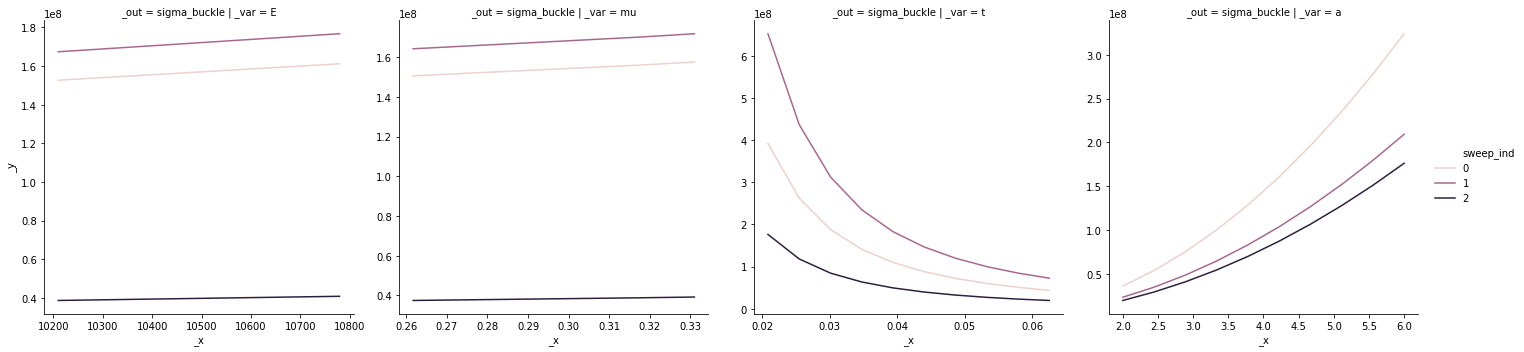

In [19]:
(
    md_plate
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)

```{admonition} Sinews indicate an incorrect model!
:class: warning
This sinew plot doesn't match the intuition we stated above! As we increase the length `a` the plate becomes *harder* to buckle (the buckling stress increases), while when we make the plate thicker the plate becomes *easier* to buckle (buckling stress decreases).
```

By sanity-checking the model with a sinew plot, we can see that the model has incorrect behavior. Reviewing the code above, it seems the $a$ and $t$ terms are swapped. We can fix that easily and re-run the sweeps.


Calling plot_sinew_outputs....


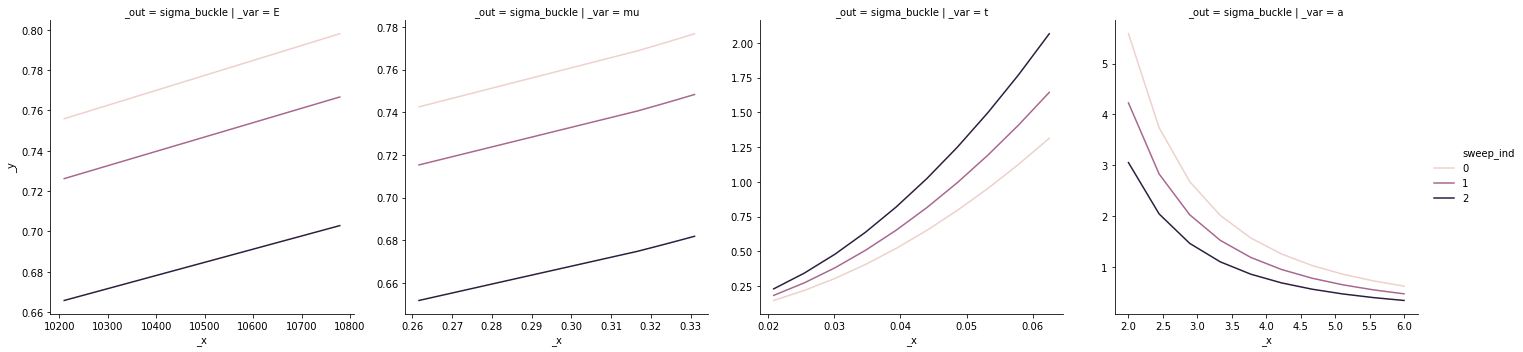

In [20]:
md_plate_v2 = (
    md_aluminum_v2
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            sigma_buckle=3.14159**2 * df.E
                        / 12 / (1 - df.mu**2)
                        * df.t**2 / df.a**2
        ),
        var=["E", "mu", "a", "t"],
        out=["sigma_buckle"],
        name="Buckling strength",
    )
    >> gr.cp_bounds(
        a=(2, 6),
        t=(1/48, 1/16),
    )
)

(
    md_plate_v2
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)


This matches our intuition, and provides a quantitative comparison between the inputs. Note that the range of critical buckling values is quite small in the material property panels, while the ranges associated with the plate thickness and length are much wider. This implies that we can adjust the plate dimensions to achieve our desired safety goal, as the buckling behavior is much more sensitive to the plate geometry than material properties.

```{admonition} Unstated part of the goal
:class: warning
Note that we had to specify bounds for the *length* of the plate to run the sweep. We didn't specify a plate length above in our goal! To correct this oversight, let's update our goal to specify plates $6$ inches in length.
```

Finally, to complete our modeling, we will incorporate the target load of $1$ ksi by defining a *limit state function* {cite}`ditlevsen2005structural`

$$g_{\text{buckle}} = \sigma_{\text{buckle}} - \sigma_{\text{applied}},$$

with $\sigma_{\text{applied}} = 1$ ksi. The limit state function $g$ standardizes the interpretation of our quantitative failure model: Cases where $g > 0$ correspond to safe operation, while $g \leq 0$ correspond to failure.

In [21]:
md_buckling = (
    md_plate_v2
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            g_buckle=df.sigma_buckle - 1.0
        ),
        var=["sigma_buckle"],
        out=["g_buckle"],
        name="Limit state",
    )
)
md_buckling

model: Plate aluminum material properties

  inputs:
    var_det:
      t: [0.020833333333333332, 0.0625]
      a: [2, 6]

    var_rand:
      E: (+0) norm, {'loc': 10494.444444444445, 'scale': 122.34841969747357}
      mu: (+0) beta, {'a': 6.906673364779303, 'b': 0.6456702700075123, 'loc': 0.2616870498769197, 'scale': 0.06931295012308032}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.030156

  functions:
      Buckling strength: ['E', 'mu', 'a', 't'] -> ['sigma_buckle']
      Limit state: ['sigma_buckle'] -> ['g_buckle']

Now we have a complete model with which to conduct our analysis.


### Analyzing the model

We are interested in determining a plate thickness that gives a chance of failure less than 1 in 100. To estimate the probability of failure (POF), we will use a Monte Carlo simulation technique (Chapter TODO) with the probabilistic model we just constructed.

To start, we will analyze a plate with thickness $1/48$"; the lower end of sizes considered in our dataset.


In [22]:
(
    md_buckling
    >> gr.ev_monte_carlo(
        n=1e2,
        seed=101,
        df_det=gr.df_make(a=6, t=1/48),
    )
    >> gr.tf_summarize(
        pof_lo=gr.binomial_ci(DF.g_buckle <= 0, side="lo"),
        pof_est=gr.mean(DF.g_buckle <= 0),
        pof_up=gr.binomial_ci(DF.g_buckle <= 0, side="up"),
    )
)

eval_monte_carlo() is rounding n...


,pof_lo,pof_est,pof_up
0,0.963007,1.0,1.0


Clearly, the probability of failure is *much* higher than our desired $0.01$! Let's try the other end of the range with a thickness of $1/16$".


In [23]:
(
    md_buckling
    >> gr.ev_monte_carlo(
        n=1e2,
        seed=101,
        df_det=gr.df_make(a=6, t=1/16)
    )
    >> gr.tf_summarize(
        pof_lo=gr.binomial_ci(DF.g_buckle <= 0, side="lo"),
        pof_est=gr.mean(DF.g_buckle <= 0),
        pof_up=gr.binomial_ci(DF.g_buckle <= 0, side="up"),
    )
)

eval_monte_carlo() is rounding n...


,pof_lo,pof_est,pof_up
0,0.0,0.0,0.036993


The estimated probability of failure `pof_est` is zero! That certainly satisfies our goal of `pof < 0.01`, but it seems fishy....

```{admonition} Calculation tolerances
:class: warning
The Monte Carlo approach gives us an estimate for our target quantity, but also a *confidence interval* (CI). A CI gives us a possible range where the true value may land. The CI we see above violates our constraint (`pof_up > 0.01`), which indicates our simulation needs more refinement to provide a more trustworthy answer.
```

We can refine our simulation by increasing the sample size `n` in our Monte Carlo evaluation. A rough rule-of-thumb when estimating low-probability events is to use a sample size of $n = 20 / p$, where $p$ is our best-guess for the small probability. Since we're targeting a failure rate of 1 in 100, we'll set $p = 0.01$ and apply the heuristic.


In [24]:
(
    md_buckling
    >> gr.ev_monte_carlo(
        n=20 / 0.01,
        seed=101,
        df_det=gr.df_make(a=6, t=1/16)
    )
    >> gr.tf_summarize(
        pof_lo=gr.binomial_ci(DF.g_buckle <= 0, side="lo"),
        pof_est=gr.mean(DF.g_buckle <= 0),
        pof_up=gr.binomial_ci(DF.g_buckle <= 0, side="up"),
    )
)

eval_monte_carlo() is rounding n...


,pof_lo,pof_est,pof_up
0,8.673617e-19,0.0,0.009512


Success! We have refined our results and found a thickness that confidently satisfies our POF constraint. This achieves our goal, and finishes the case study. $\square.$

```{admonition} Going further
:class: tip
We found *a* thickness that satisfies our POF constraint, but we could go further by seeking an *optimal* thickness that meets the same constraint. In Chapter TODO we will see a more detailed formulation that uses the reliability properties we estimated here within a design optimization.
```


## A general process

The brief case study above suggests an interative process you can use to approach model analysis under uncertainty:

- Define your **goals** for your study. Use these goals to focus your work, but remain open to adjusting your goals if necessary.
  - This might include making your goal more specific, as we did with specifying a plate length above.
- Iteratively **build** a model for your study. This includes specifying the functions, the inputs, and a description of the inputs with bounds or a joint density.
  - The ideal approach is to use representative data to inform your model. We used a dataset of measured aluminum properties above.
  - If data are not available, consulting literature is an acceptable way to build your model. We used a classic reference to arrive at the buckling function above.
  - You will likely discover surprises along the way, as we saw with the thickest plate specimens above. These may necessitate follow-up studies or reasonable assumptions.
- Iteratively **analyze** your model to provide a trustworthy results that support your goal.
  - You will likely have to iterate on your methods to arrive at trustworthy results, as we saw with refining the Monte Carlo simulation above.

Throughout the whole process, use the dual modes of curiosity and skepticism to guide your process.


<!-- footnote definitions -->

[^jb]: We are thankful to the folks at the [Jupyter Book](https://jupyterbook.org/intro.html) project, whose work enabled this Python-powered textbook!

[^n_sweeps]: Formally, the computational complexity is linear in `n_sweeps`.

[^stretch]: More formally, elasticity is a material property while stiffness is a property of a structure. Elasticity is thought to be a material property, while stiffness is a function of both the material elastic properties, and the geometry of the structure being studied.